Biblioteca python para visualização de dados.

In [3]:
import seaborn as sns # Sam Norman Seaborn do seriado West Wing
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# carregando dados fornecidos pelo seaborn (dados de gorgetas)
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Com pandas

In [1]:
# import pandas as pd # já ta no começo

In [4]:
df = pd.read_csv('')
sns.countplot(x='coluna', data=df) # chama a coluna, depois chama o dataframe de origem
plt.show() 

FileNotFoundError: File b'' does not exist

Seaborn funciona bem com dataframes se os dados estiverem organizados:
- cada observação temsua linha
- cada variável tem sua coluna
- Sem linhas que não são registro, essas coisas que sujam o dataframe

Uma outra vantagem é a facilidade de adicionar variáveis aos gráficos usando cores diferentes

## Scatter plot
- Cada ponto é uma observação independente

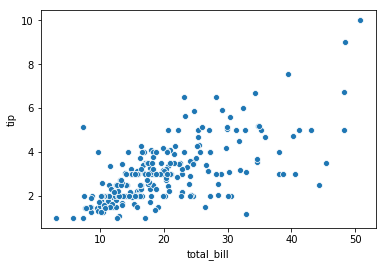

In [6]:
sns.scatterplot(x="total_bill", y='tip', data=tips)

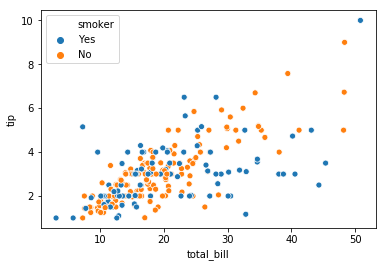

In [7]:
# adicionando outra variável:
sns.scatterplot(x="total_bill", y='tip', data=tips, hue='smoker') 
# usa os mesmos valores de x e y, mas colore de acordo com a variável 'smoker'; adiciona legenda automaticamente.

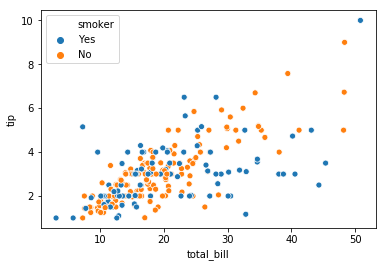

In [8]:
# fixando ordem da legenda: atributo hue_order
sns.scatterplot(x="total_bill", y='tip', data=tips, hue='smoker', hue_order=['Yes', 'No']) 

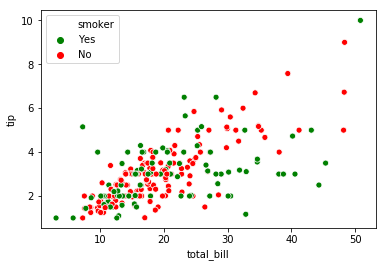

In [9]:
# customizando as cores: atributo palette (pode receber o nome da cor, sigla ou código html hexadecimal de cor; sempre entre "")
hue_colors = {"Yes": "green", "No":"Red"}
sns.scatterplot(x="total_bill", y='tip', data=tips, hue='smoker', palette=hue_colors) 

### Hue (matiz) no bar count plot

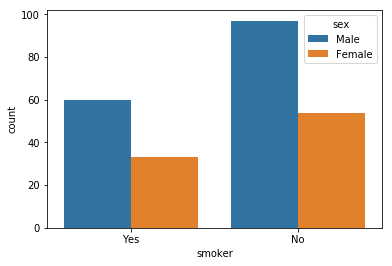

In [10]:
sns.countplot("smoker", data=tips, hue="sex") # cria em cada valor duas barras de contagem

### Relational plots:
- Descrevem a relação entre duas variáveis quantitativas (dispersão e linha);
- Cria subplots na mesma figura;
- Adicionamos a terceira variável (dividindo os dados em grupos) não por cores mas por dois gráficos separadamente (subplots):

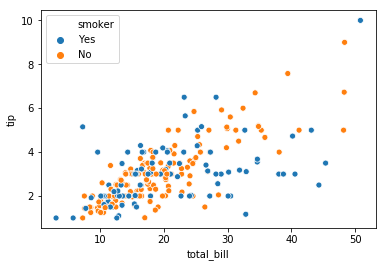

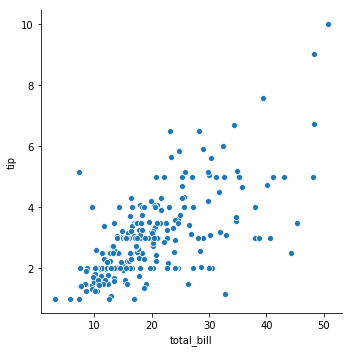

In [11]:
# trocando scatterplot por relplot:
sns.scatterplot(x="total_bill", y='tip', data=tips, hue='smoker')
sns.relplot(x="total_bill", y='tip', data=tips, kind='scatter')

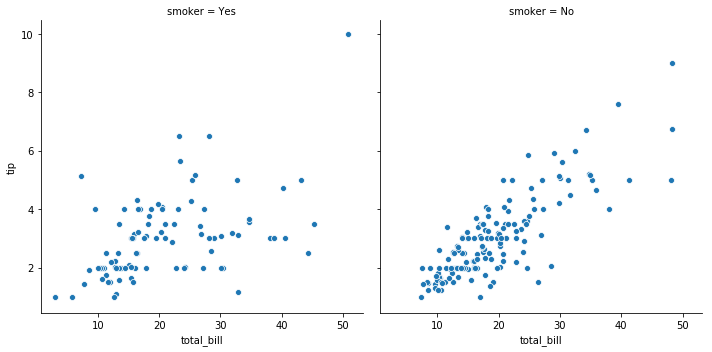

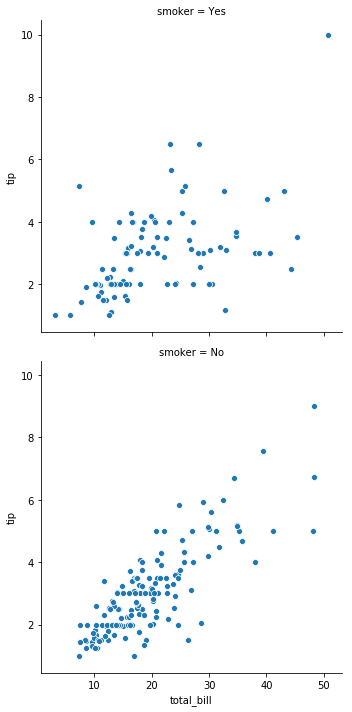

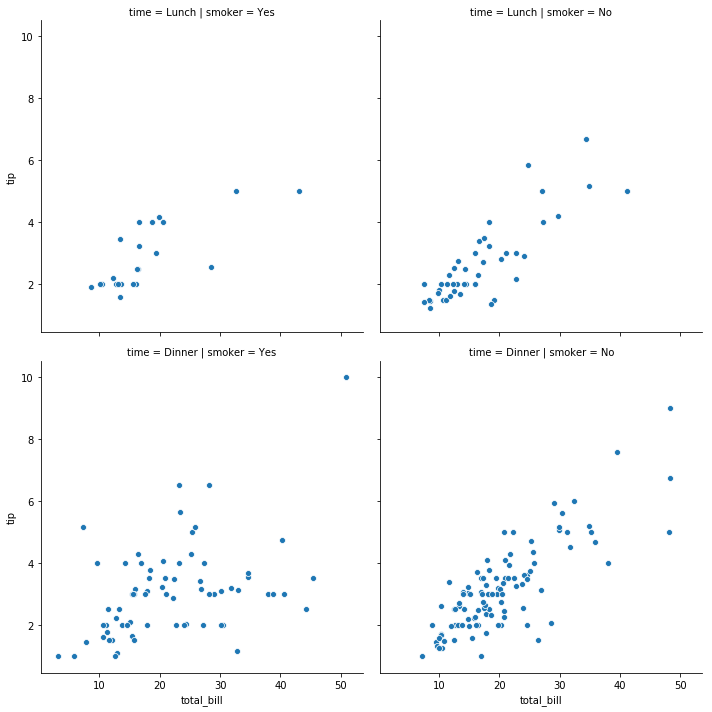

In [13]:
# parâmetro col: cria subplots agrupando os dados por valor da variável(level de) smoker (dispoe os suplots em colunas/uma linha)
sns.relplot(x="total_bill", y='tip', data=tips, kind='scatter', col = 'smoker') 
# parâmetro row: cria subplots agrupando os dados por valor da variável smoker (dispoe os suplots em linhas/uma coluna)
sns.relplot(x="total_bill", y='tip', data=tips, kind='scatter', row = 'smoker') 
# ambos juntos:
sns.relplot(x="total_bill", y='tip', data=tips, kind='scatter', col = 'smoker', row = 'time') 

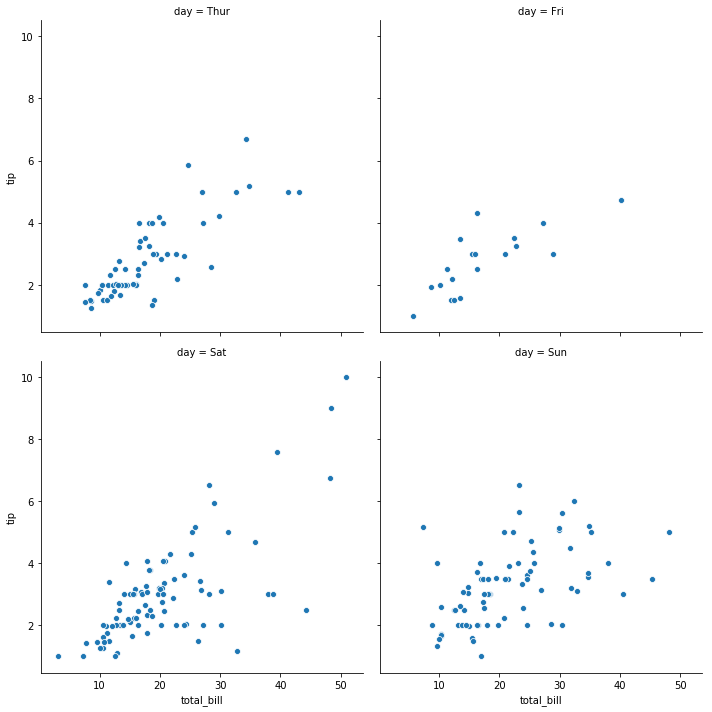

In [16]:
# definindo quebra de linha: se tivermos mais de dois valores discriminantes nos subplots:
sns.relplot(x="total_bill", y='tip', data=tips, kind='scatter', col = 'day', col_wrap = 2) 

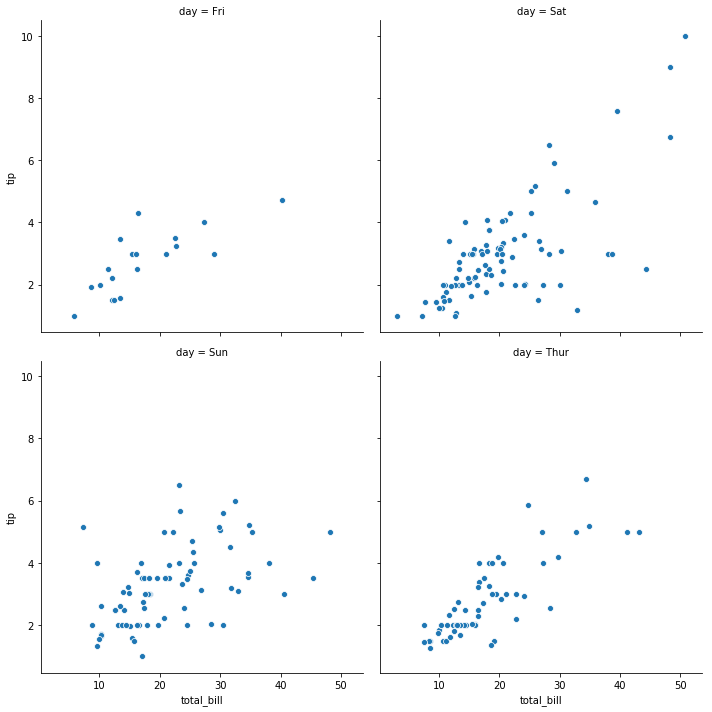

In [18]:
# mesma coisa mas fixando a ordem:
sns.relplot(x="total_bill", y='tip', data=tips, kind='scatter', col = 'day', col_wrap = 2,col_order=["Fri","Sat","Sun", "Thur"]) 

### Customização do scatter

- Já vimos os parâmetros row, col, hue e derivados -> exclusivos do sns.relplot
- As customizações abaixo listadas funcionam no sns.scatterplot e no relplot.


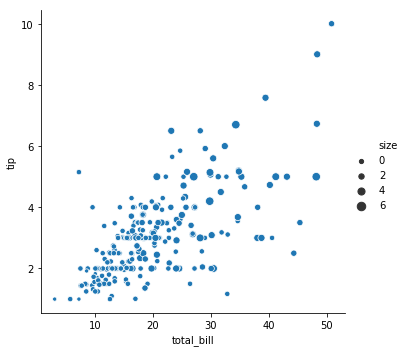

In [6]:
# tamanho do ponto:
sns.relplot(x="total_bill", y='tip', data=tips, kind='scatter',size='size')
# atribuimos ao parâmetro size, a variávelnumérica "size" do dataset. A legenda com o valor é automática.
# poderia ser variável categórica também

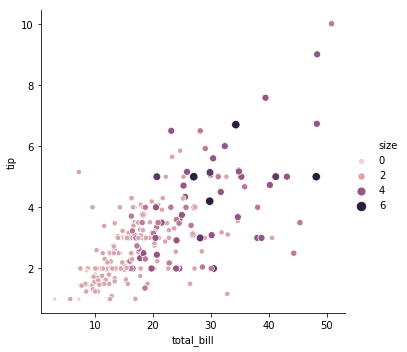

In [8]:
# combinando tamanho com cor:
sns.relplot(x="total_bill", y='tip', data=tips, kind='scatter',size='size',hue='size')
# variáveis numericas colorem com diferentes tons do mesmo tom.

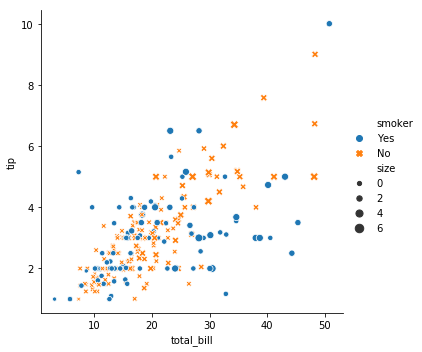

In [10]:
# estilo do ponto:
sns.relplot(x="total_bill", y='tip', data=tips, kind='scatter',size='size',hue='smoker',style='smoker')

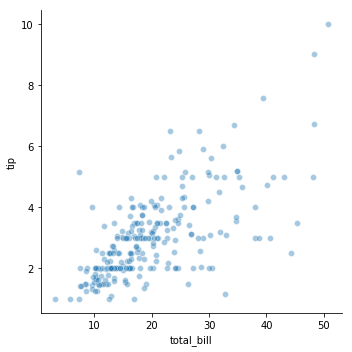

In [11]:
# transparencia:
sns.relplot(x="total_bill", y='tip', data=tips, kind='scatter',alpha=0.4) #alpha=0 transparente; alpha=1 opaco
# aconselhado pra visualização de pontos sobrepostos.

## Line plots
- Junto com o scatter (dispersão) são as opções de gráficos relacionais do seaborn.
- Observa uma "coisa" variando, normalmente com o tempo.

In [ ]:
# DIvidindo uma variável em subgrupos (terá uma linha pra cada com um estilo diferente)
sns.relplot(x=' ', y=' ', data= , kind='line', style=' ', hue=' ')
    # style define a variável referencia para os subgrupos (cada valor define qual subgrupo está o registro)
sns.relplot(x=' ', y=' ', data= , kind='line', style=' ', hue=' ', dashes=False) 
    # se quiser que seja o mesmo estilo cada linha/subgrupo
sns.relplot(x=' ', y=' ', data= , kind='line', style=' ', hue=' ', marker=True) 
    # mostra os pontos na linha num estilo diferente pra cada subgrupo

In [ ]:
# múltiplas observações (mais de um registro no mesmo valor de x):
    # por default o plot faz a média desses valores e calcula um intervalo de confiança 95% (mostra em região ao redor da linha)
# para que essa área em volta da linha mostre o desvio padrão:
sns.relplot(x=' ', y=' ', data= , kind='line', ci='sd') 
# para desativar a área:
sns.relplot(x=' ', y=' ', data= , kind='line', ci=None) 

# Visualizações de variáveis categóricas
- Count plot e gráfico de barras
- Usados para visualização de variáveis categóricas


### Gráfico de contagem (count plot)
- Exibe o número de observações de cada categoria (valor da variável) em barras.
- countplot() é a função específica pra count; catplot() é a genérica para dados categóricos.
- catplot() oferece a mesma flexibilidade do relplot:
    - atributos col e row, kind, order (pra definir a ordem das barras)

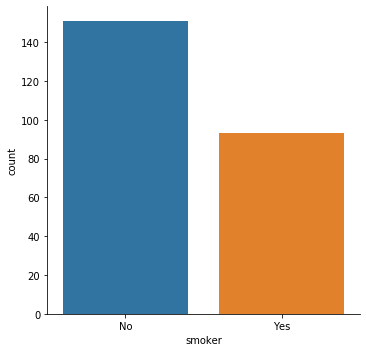

In [7]:
sns.catplot(x='smoker', data=tips, kind='count', order=['No','Yes'])

### Gráfico de barra
- Mostra a média de valores de uma variável numérica para cada categoria (valor) de uma variável categórica
- por default mostra a barra de intervalo de confiança de 95% no topo de cada barra (assume que a amostra é aleatória)

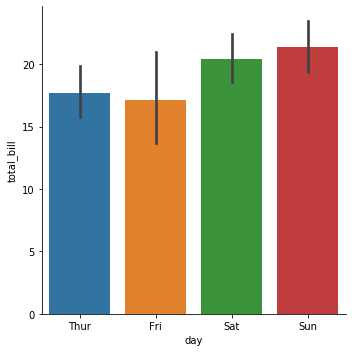

In [9]:
sns.catplot(x='day', y='total_bill', data=tips, kind='bar')

In [ ]:
# removendo barra de intervalod e confiança:
sns.catplot(x='day', y='total_bill', data=tips, kind='bar', ci=None)

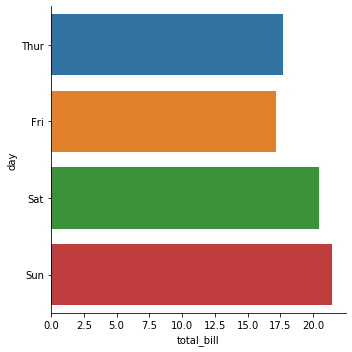

In [10]:
# Pra inverter eixo x e y basta trocar dentro da função (recomenda-se que a variável x seja a categórica)
sns.catplot(x='total_bill', y='day', data=tips, kind='bar', ci=None)

### Boxplot
- Representação da distribuição de dados quantitatios
- Já falamos sobre isso.

Whisker = bigode: linha horizontal fora da caixa.
Por default distam 1,5 vezes o IQR (intervalo interquartil = altura da caixa = valor(75%) - valor(25%))

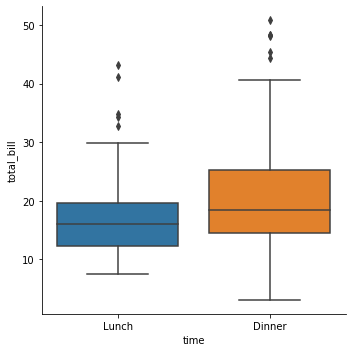

In [5]:
sns.catplot(x="time", y="total_bill", data=tips, kind='box') 
# cria n boxplots, sendo n o número de valores diferentes de "time"

In [ ]:
# Atrubuto order: já sabe o que faz.
# Atrubuto sym: altera a aparência dos outliers
    # sym="": oculta os outliers

# Atributo whis: altera o bigode:
    # whis = 2.0 -> altera a distância do bigota para a caixa para 2xIQR
    # whis = [5,95] -> fixa a posição dos bigodes no 5o e no 95o percentil
    # whis = [5,95] -> fixa a posição dos bigodes no mínimo e máximo

### Point plots
- Mostra a média de uma variável quantitativa em um único ponto (ou n pontos para n categorias)
- Mostra uma barra vertical centralizada no ponto, indicando o intervalode confiança de 95% (assumindo os dados como amostra de população)
- Semelhanças com lineplot:
    - ambos mostram média (da variável quantitativa) e intervalo de 95%
- Diferenças:
    - pointplot tem variável categórica no eixo x, line tem variável numérica/quantitativa.
- Semelhanças com barplot:
    - ambos mostram média e intervalo de 95%

In [ ]:
sns.catplot(kind='point')
# join = False -> tira a linha que liga os pontos
sns.catplot(kind='point', join = False )

# trocar o ponto de média pra mediana
from numpy import median # importe a função median
sns.catplot(kind='point', join = False, estimator=median )


# capsize: faz um bigode na barra de tamanho 0.2
sns.catplot(kind='point', join = False, capsize = 0.2)

# ci = None: tira a barra
sns.catplot(kind='point', join = False, capsize = 0.2, ci = None)

## Customização

- aplicável a todos os plots do seaborn.

In [ ]:
# estilos pré-definidos: 
    # função set_style atribui o estilo a todos os gráficos posteriores.
sns.set_style("white") #default
sns.set_style("whitegrid") # branco com linhas atrás
sns.set_style("ticks") # mostra marcações (tracinhos) nos eixos onde tem os números.
sns.set_style("dark") # fundo mais escuro
sns.set_style("darkgrid") # escuro com linhas atrás

In [ ]:
# cores de diferentes variáveis: todos os exemplos abaixo combinam dois gradientes opostos e uma cor branca neutra 
sns.set_palette("RdBu") #redbull red to blue: azul e vermelho
sns.set_palette("PRGn") # roxo e verde
sns.set_palette("RdBu_r") #redbull reverso (só troca uma cor com outra)
sns.set_palette("RdBu")
sns.set_palette("PRGn_r")

# paletas sequenciais: um gradiente único -> recomendado para enfatizar uma variável em escalas contínuas
sns.set_palette("Greys") # branco a preto
sns.set_palette("Blues") # branco a azul
sns.set_palette("PuRd") # branco a roxo
sns.set_palette("GnBu") # verde claro a azul escuro

# paleta customizada: passe uma lista de cores (nome ou código hexadecimal)
custom_palette = ["red", "orange", "yellow"]
sns.set_palette(custom_palette)

In [ ]:
# escala de impressão: de pequeno a grande: aumenta o tamanho das letras pra visualizar de longe
# "paper" (default) -> "notebook" -> "talk" -> "poster"
sns.set_context("poster")

# Objetos

Seaborn cria dois tipos de objetos:
- AxesSubplot -> plot único // ex.: scatterplot(), countplot(), etc.
- FacetGrid -> conjunto de AxesSubplot (subplots)// ex.: relplot(), catplot().

Pra descobrir qual deles você está trabalhando, atribua a função a uma variável (g por boa prática).


matplotlib.axes._subplots.AxesSubplot

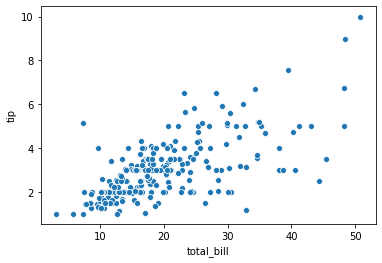

In [6]:
g = sns.scatterplot(x="total_bill", y='tip', data=tips) 
type(g) # esse é um AxesSubplot

### Título para o plot (figura toda, e não a cada subplot)

- Para FacetGrid:
    - atribua a função à variável g
    - chame o método g.fig.suptitle("Título")
    - ajustar a altura: parâmetro y
    
- Para AxesSubplot:
    - atribua a função à variável g
    - chame o método g.set_title("Título", y = 1.1)
    - ajustar a altura: parâmetro y

Text(0.5, 1.1, 'Título')

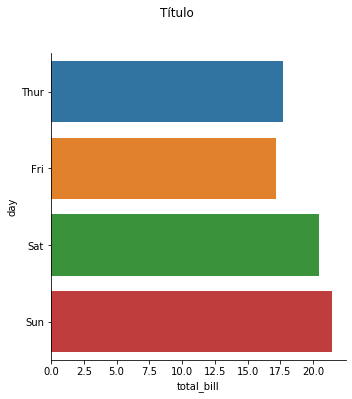

In [11]:
g = sns.catplot(x='total_bill', y='day', data=tips, kind='bar', ci=None)
g.fig.suptitle("Título", y = 1.1)

In [ ]:
# título no subplot único (AxesSubplot)
g = sns.boxplot()
g.set_title("Título", y = 1.1)

### Título para o subplot
- Se criamos os subplots usando o parâmetro col de catplot ou relplot:
    - g.set_titles("This is {col_name}") # usa a variável col_name pra criar titulos diferentes pra cada subplot
    - obs.: atentar ao plural de title / lembrar de atribuir a g

In [ ]:
g = sns.catplot()
g.set_titles("This is {col_name}")

### Adicionando título aos eixos
- Para ambos os objetos é:

In [ ]:
g.set(xlabel = "X Label",
      ylabel = "Y Label")

In [ ]:
# pra rotacionar podemos usar a função do matplotlib mesmo:
plt.xticks(rotation=90)